# Igniters Hackathon Day 11: Electricity Bill Predictor
## Gokul Krishna Balaji, CS24B2053

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Getting the dataset directly from the url

url = "https://raw.githubusercontent.com/sharad00004/AI-ML-HACKATHON-Datasets/main/electricity_bill_dataset.csv"
df = pd.read_csv(url)
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB




*   We have 45345 entries in total.
*   There are two "object" datatype columns: they must be one-hot-encoded to make sure we can train our model.





In [4]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [5]:
print(df["MotorPump"].unique())

[0]


In [6]:
df = df.drop(columns=["MotorPump"])
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [7]:
print(df.isnull().sum())

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


* All columns seem normal except for the "MotorPump" column: all the values in it are 0. So we can remove the column as it is not of any use.
* There are also no null values in any column. Hence there is no need for imputation.

In [8]:
# Creating dummies for columns that have "object" datatype
# drop_first=True avoids the dummy variable trap by removing the first category

df_dummies = pd.get_dummies(df, columns=["City", "Company"], drop_first=True)
df_dummies.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill,City_Chennai,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
0,16,23.0,2.0,6.0,1.0,10,384,8.4,3225.6,False,...,False,False,False,False,False,True,False,False,False,False
1,19,22.0,2.0,3.0,1.0,5,488,7.8,3806.4,False,...,False,False,False,False,False,False,False,False,False,False
2,7,20.0,2.0,6.0,7.0,7,416,7.7,3203.2,False,...,False,False,False,False,False,False,False,False,False,False
3,7,22.0,3.0,21.0,1.0,6,475,9.2,4370.0,False,...,False,False,False,False,False,False,False,False,False,False
4,11,23.0,2.0,11.0,1.0,2,457,9.2,4204.4,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_dummies.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'MonthlyHours', 'TariffRate', 'ElectricityBill',
       'City_Chennai', 'City_Dahej', 'City_Faridabad', 'City_Gurgaon',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai', 'City_Nagpur',
       'City_Navi Mumbai', 'City_New Delhi', 'City_Noida', 'City_Pune',
       'City_Ratnagiri', 'City_Shimla', 'City_Vadodara',
       'Company_Bonfiglioli Transmission Pvt. Ltd.', 'Company_CESC',
       'Company_GE T&D India Limited', 'Company_Guj Ind Power',
       'Company_Indowind Energy', 'Company_JSW Energy Ltd.',
       'Company_Jaiprakash Power', 'Company_Jyoti Structure',
       'Company_KEC International', 'Company_Kalpataru Power',
       'Company_L&T Transmission & Distribution',
       'Company_Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.',
       'Company_NHPC', 'Company_NLC India', 'Company_NTPC Pvt. Ltd.',
       'Company_Neueon Towers / Sujana Towers Ltd.',
       'Compan

## Creating a function to train multiple models
We will be experimenting with various different models. So it is easier to train and track the results with the help of a function.


In [10]:
def train_and_track(model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import mean_squared_error, r2_score

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return rmse, r2

## Model and Dataset Variations for Experimentation

To evaluate the effectiveness of different machine learning approaches, we experiment with multiple model configurations and preprocessing strategies. Specifically, we use:

- **Two different regression models**: `LinearRegression` and `RandomForestRegressor`
- **Two versions of the dataset**:
  - **Unscaled**: Raw feature values without any normalization or scaling.
  - **Scaled**: Feature values scaled using `RobustScaler` to handle outliers.
    - **With Outliers**: No data points are removed.
    - **Outliers Removed**: Rows where any scaled feature has an absolute value greater than 3 are removed.

In total, this results in **6 experiments** (2 models × 3 dataset versions).

This setup allows us to assess how each model performs under different data conditions and helps identify which combination yields the best results.

In [11]:
# Splitting the dataset into X and y where 'ElectricityBill' is the target column

X = df_dummies.drop('ElectricityBill', axis=1)
y = df_dummies['ElectricityBill']

# Splitting X, y into X_train, X_test, y_train, y_test
# Unscaled dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Creating a new dataframe with scaled columns by using RobustScaler

from sklearn.preprocessing import RobustScaler

columns_to_scale = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'Month', 'MonthlyHours', 'TariffRate', 'ElectricityBill']
scaler = RobustScaler()

df_scaled = df_dummies.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill,City_Chennai,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
0,0.2,1.0,0.0,-0.7,0.0,0.666667,-0.761628,0.0,-0.724561,False,...,False,False,False,False,False,True,False,False,False,False
1,0.5,0.0,0.0,-1.0,0.0,-0.166667,-0.156977,-0.6,-0.332659,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.7,-2.0,0.0,-0.7,6.0,0.166667,-0.575581,-0.7,-0.739676,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.7,0.0,1.0,0.8,0.0,0.000000,-0.232558,0.8,0.047638,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.3,1.0,0.0,-0.2,0.0,-0.666667,-0.337209,0.8,-0.064103,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Scaled but with outliers

X_scaled = df_scaled.drop('ElectricityBill', axis=1)
y_scaled = df_scaled['ElectricityBill']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

In [14]:
# Scaled and removed outliers

train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
threshold = 3
mask = (np.abs(train_scaled[X_train_scaled.columns]) < threshold).all(axis=1)

X_train_no_outliers = X_train_scaled[mask]
y_train_no_outliers = y_train_scaled[mask]

In [15]:
# 1. Linear Regression on Unscaled Data
model_lr_unscaled = LinearRegression()

# 2. Random Forest on Unscaled Data
model_rf_unscaled = RandomForestRegressor(random_state=42)

# 3. Linear Regression on Scaled Data (with outliers)
model_lr_scaled = LinearRegression()

# 4. Random Forest on Scaled Data (with outliers)
model_rf_scaled = RandomForestRegressor(random_state=42)

# 5. Linear Regression on Scaled Data (outliers removed)
model_lr_scaled_clean = LinearRegression()

# 6. Random Forest on Scaled Data (outliers removed)
model_rf_scaled_clean = RandomForestRegressor(random_state=42)

## Training all the 6 variations
* We are appending the result tuples to a list called "results".
* We will then use this as a dataframe to visualize the results and find out which is the best performing model.

In [16]:
results = []

# 1. Linear Regression on Unscaled Data
rmse, r2 = train_and_track(model_lr_unscaled, X_train, X_test, y_train, y_test)
results.append(("LinearRegression", "Unscaled", rmse, r2))

# 2. Random Forest on Unscaled Data
rmse, r2 = train_and_track(model_rf_unscaled, X_train, X_test, y_train, y_test)
results.append(("RandomForest", "Unscaled", rmse, r2))

# 3. Linear Regression on Scaled Data (with outliers)
rmse, r2 = train_and_track(model_lr_scaled, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
results.append(("LinearRegression", "Scaled", rmse, r2))

# 4. Random Forest on Scaled Data (with outliers)
rmse, r2 = train_and_track(model_rf_scaled, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
results.append(("RandomForest", "Scaled", rmse, r2))

# 5. Linear Regression on Scaled Data (outliers removed)
rmse, r2 = train_and_track(model_lr_scaled_clean, X_train_no_outliers, X_test_scaled, y_train_no_outliers, y_test_scaled)
results.append(("LinearRegression", "Scaled (Clean)", rmse, r2))

# 6. Random Forest on Scaled Data (outliers removed)
rmse, r2 = train_and_track(model_rf_scaled_clean, X_train_no_outliers, X_test_scaled, y_train_no_outliers, y_test_scaled)
results.append(("RandomForest", "Scaled (Clean)", rmse, r2))

In [17]:
results_df = pd.DataFrame(results, columns=["Model", "Dataset", "RMSE", "R²"])
results_df

,Model,Dataset,RMSE,R²
0,LinearRegression,Unscaled,70.563461,0.995630
1,RandomForest,Unscaled,5.502792,0.999973
2,LinearRegression,Scaled,0.047614,0.995630
3,RandomForest,Scaled,0.003624,0.999975
4,LinearRegression,Scaled (Clean),0.047627,0.995628
5,RandomForest,Scaled (Clean),0.017787,0.999390


## Model Performance Comparison with Different Preprocessing Strategies

To figure out which model and preprocessing combo works best, we ran a bunch of experiments — six in total. We used two models:

- `LinearRegression`
- `RandomForestRegressor`

And tested them on three versions of the dataset:

1. **Unscaled** – raw feature values, no scaling
2. **Scaled** – used `RobustScaler` to handle outliers
3. **Scaled (Outliers Removed)** – same as above, but we also dropped rows with extreme values (anything with an absolute value over 3)

We evaluated the models using:

- **RMSE**: Lower is better. Measures how far off our predictions are on average.
- **R² Score**: Closer to 1 is better. Tells us how well the model explains the data.

### How It All Performed

Here's a summary of the results:

| Model              | Dataset           | RMSE       | R²      |
|-------------------|-------------------|------------|---------|
| LinearRegression   | Unscaled          | 70.56      | 0.9956  |
| RandomForest       | Unscaled          | 5.50       | 0.9999  |
| LinearRegression   | Scaled            | 0.0476     | 0.9956  |
| RandomForest       | Scaled            | 0.0036     | 0.9999  |
| LinearRegression   | Scaled (Cleaned)  | 0.0476     | 0.9956  |
| RandomForest       | Scaled (Cleaned)  | 0.0178     | 0.9994  |

### What We Can See

- **Scaling made a huge difference**, especially for Linear Regression. It went from a horrible RMSE of ~70 down to just ~0.047 after scaling.
- **Random Forest was the clear winner across the board.** It had much lower RMSE and higher R² than Linear Regression in every case.
- **Removing outliers didn’t help much.** In fact, Random Forest actually did slightly worse when outliers were removed — probably because it's already pretty good at handling outliers on its own.
- The best performance came from **RandomForestRegressor on the scaled dataset without removing outliers**, with an RMSE of just **0.0036** and an R² of **0.99997**. That’s basically a perfect fit.

### Which Model to Use

If we’re picking a winner, it’s a no-brainer:

**RandomForestRegressor on the scaled dataset (with outliers left in)**

It’s the most accurate, requires the least fuss (no outlier removal), and gives the best overall results. Clean, efficient, and crazy accurate.

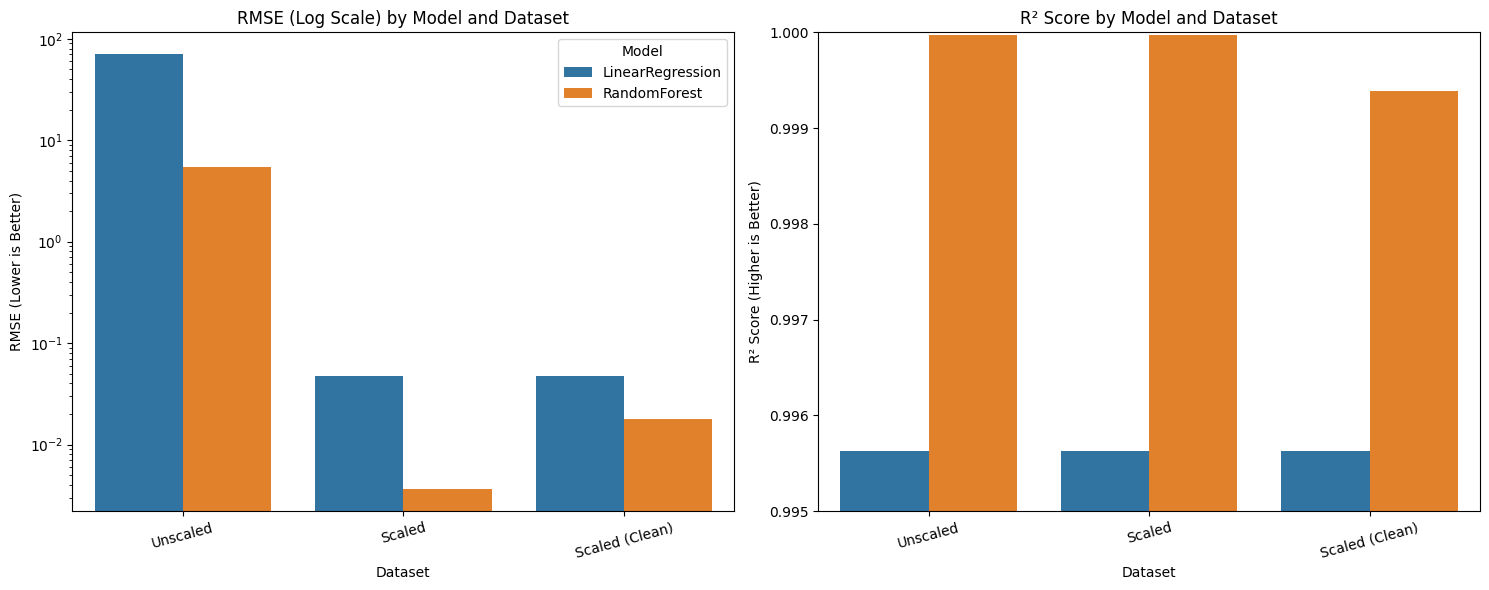

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=results_df, x="Dataset", y="RMSE", hue="Model", ax=axes[0])
axes[0].set_title("RMSE (Log Scale) by Model and Dataset")
axes[0].set_ylabel("RMSE (Lower is Better)")
axes[0].set_xlabel("Dataset")
axes[0].set_yscale("log")
axes[0].tick_params(axis='x', rotation=15)
axes[0].legend(title="Model")

sns.barplot(data=results_df, x="Dataset", y="R²", hue="Model", ax=axes[1])
axes[1].set_title("R² Score by Model and Dataset")
axes[1].set_ylabel("R² Score (Higher is Better)")
axes[1].set_xlabel("Dataset")
axes[1].set_ylim(0.995, 1.0)
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.show()

## Tuning Random Forest with Different `n_estimators` Values

To determine how the number of trees (`n_estimators`) affects the model's performance, we run experiments using six different values. This helps us identify which configuration yields the most accurate predictions.

By looping through these values and tracking both RMSE and R², we can visualize and compare how the model improves (or doesn't) as more trees are added to the forest.

The values tested are: 10, 50, 100, 200, 300, and 500.


In [19]:
# Define list of n_estimators to try
n_estimators_list = [10, 50, 100, 200, 300, 500]
rf_tuning_results = []

# Loop through each value
for n in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    rmse, r2 = train_and_track(model, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
    rf_tuning_results.append((n, rmse, r2))

# Convert to DataFrame
import pandas as pd

results_rf_df = pd.DataFrame(rf_tuning_results, columns=["n_estimators", "RMSE", "R²"])
results_rf_df

,n_estimators,RMSE,R²
0,10,0.004793,0.999956
1,50,0.003658,0.999974
2,100,0.003624,0.999975
3,200,0.003564,0.999976
4,300,0.003489,0.999977
5,500,0.003520,0.999976


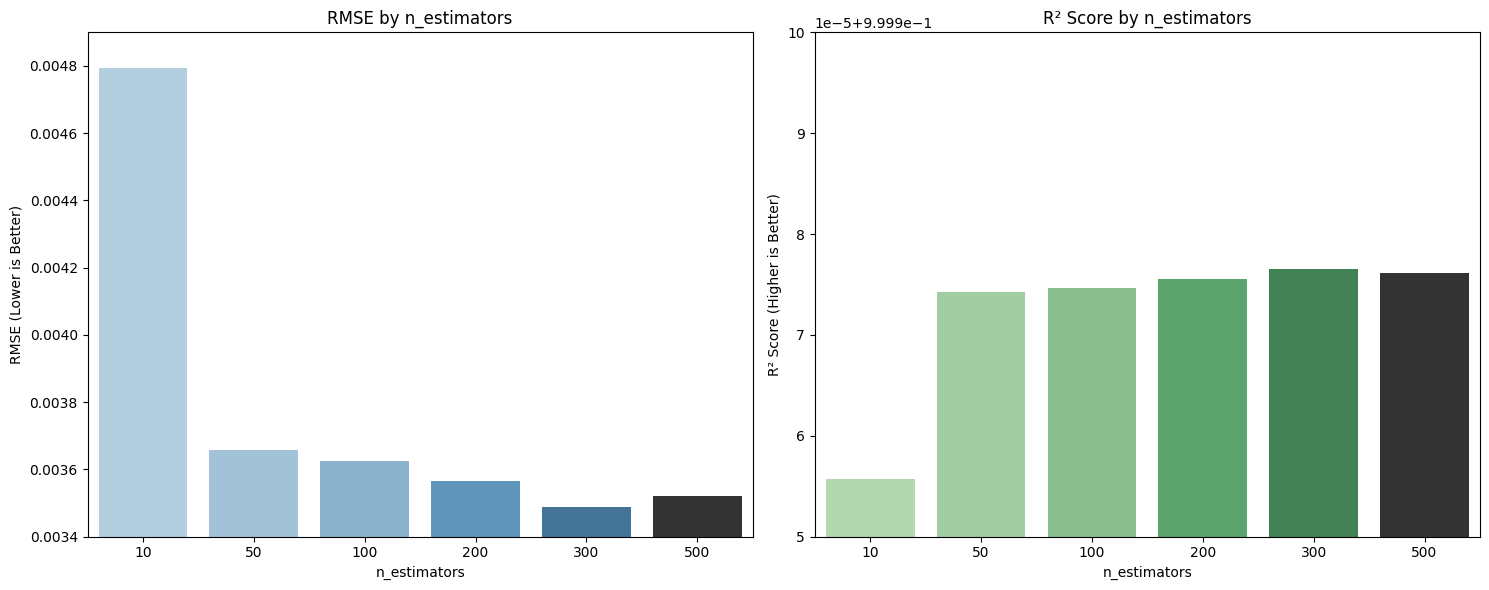

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=results_rf_df, x="n_estimators", y="RMSE", hue="n_estimators",
            ax=axes[0], palette="Blues_d", legend=False)
axes[0].set_title("RMSE by n_estimators")
axes[0].set_ylabel("RMSE (Lower is Better)")
axes[0].set_xlabel("n_estimators")
axes[0].set_ylim(0.0034, 0.0049)
axes[0].tick_params(axis='x', rotation=0)

sns.barplot(data=results_rf_df, x="n_estimators", y="R²", hue="n_estimators",
            ax=axes[1], palette="Greens_d", legend=False)
axes[1].set_title("R² Score by n_estimators")
axes[1].set_ylabel("R² Score (Higher is Better)")
axes[1].set_xlabel("n_estimators")
axes[1].set_ylim(0.99995, 1.0)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Finding the Best `n_estimators` Value

We tested different values for `n_estimators` in our RandomForestRegressor to see which one gives the best performance.

| n_estimators | RMSE      | R²        |
|--------------|-----------|-----------|
| 10           | 0.004793  | 0.999956  |
| 50           | 0.003658  | 0.999974  |
| 100          | 0.003624  | 0.999975  |
| 200          | 0.003564  | 0.999976  |
| 300          | **0.003489**  | **0.999977**  |
| 500          | 0.003520  | 0.999976  |

### Best Choice: `n_estimators = 300`

- It gave the **lowest RMSE** and **highest R² score**
- Going higher didn’t improve the results
- So we’ll go with 300 trees for our final model


In [21]:
model_rf_scaled_final = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rmse_final, r2_final = train_and_track(
    model=model_rf_scaled_final,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train_scaled,
    y_test=y_test_scaled
)

print(f'Final RMSE Value: {rmse_final}\nFinal R² Value: {r2_final}')

Final RMSE Value: 0.003489165387506763
Final R² Value: 0.99997653308147


In [22]:
y_pred = model_rf_scaled_final.predict(X_test_scaled)

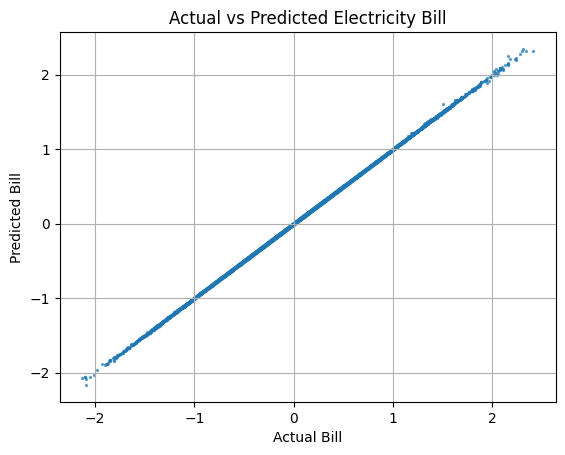

In [23]:
plt.scatter(y_test_scaled, y_pred, s=2, alpha=0.6)
plt.xlabel("Actual Bill")
plt.ylabel("Predicted Bill")
plt.title("Actual vs Predicted Electricity Bill")
plt.grid(True)
plt.show()

**Model:** RandomForestRegressor

**Best Parameters:** n_estimators = 300, random_state = 42

**Dataset Used:** Scaled (with outliers)

**Evaluation Metrics:**
- RMSE: 0.003489
- R² Score: 0.999977

**Remarks:**
This model performed the best across all tested combinations. Scaling the data improved performance significantly, and removing outliers had little impact due to Random Forest's robustness.
